In [4]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [5]:
from numpy.random import seed
import cv2
import os
import numpy as np
import skimage
from skimage.transform import resize
import csv
import itertools
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import tensorflow as tf
import keras

In [8]:
# Function to load the images
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(unique_labels):
        print(label," is ready to load")
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [9]:
# Load all the iamges
train_dir = './asl_alphabet_train/asl_alphabet_train'
unique_labels = sorted(os.listdir(train_dir))

images, labels = load_images(directory  = train_dir)
print("Data has been loaded")

A  is ready to load
B  is ready to load
C  is ready to load
D  is ready to load
E  is ready to load
F  is ready to load
G  is ready to load
H  is ready to load
I  is ready to load
J  is ready to load
K  is ready to load
L  is ready to load
M  is ready to load
N  is ready to load
O  is ready to load
P  is ready to load
Q  is ready to load
R  is ready to load
S  is ready to load
T  is ready to load
U  is ready to load
V  is ready to load
W  is ready to load
X  is ready to load
Y  is ready to load
Z  is ready to load
del  is ready to load
nothing  is ready to load
space  is ready to load
Data has been loaded


In [10]:
# Split the training and the testing datasets
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, stratify = labels)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state=42)
n = len(unique_labels)
train_n = len(x_train)
test_n = len(x_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)
unique_labels

Total number of symbols:  29
Number of training images:  65250
Number of testing images:  21750


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

model = Sequential([
	Conv2D(32, (5, 5), input_shape = (64, 64, 3)),
	Activation('relu'),
	MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    tf.keras.layers.Dropout(rate=0.3),
    
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(29, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 14, 14, 64)        0

In [12]:
from tensorflow.keras.utils import to_categorical

# one hot encoding the categorical data
y_cat_train = to_categorical(y_train, 29)
y_cat_test = to_categorical(y_test, 29)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [14]:

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [1]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

NameError: name 'x_train' is not defined

In [3]:
"""history = model.fit(
    x_train, y_cat_train,
    epochs=50,
    batch_size=64,
    verbose=2,
    validation_data=(x_test, y_cat_test),
    callbacks=[early_stop]
)
"""


'history = model.fit(\n    x_train, y_cat_train,\n    epochs=50,\n    batch_size=64,\n    verbose=2,\n    validation_data=(x_test, y_cat_test),\n    callbacks=[early_stop]\n)\n'

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
plt.show()

In [ ]:
history_df.loc[0:, ['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

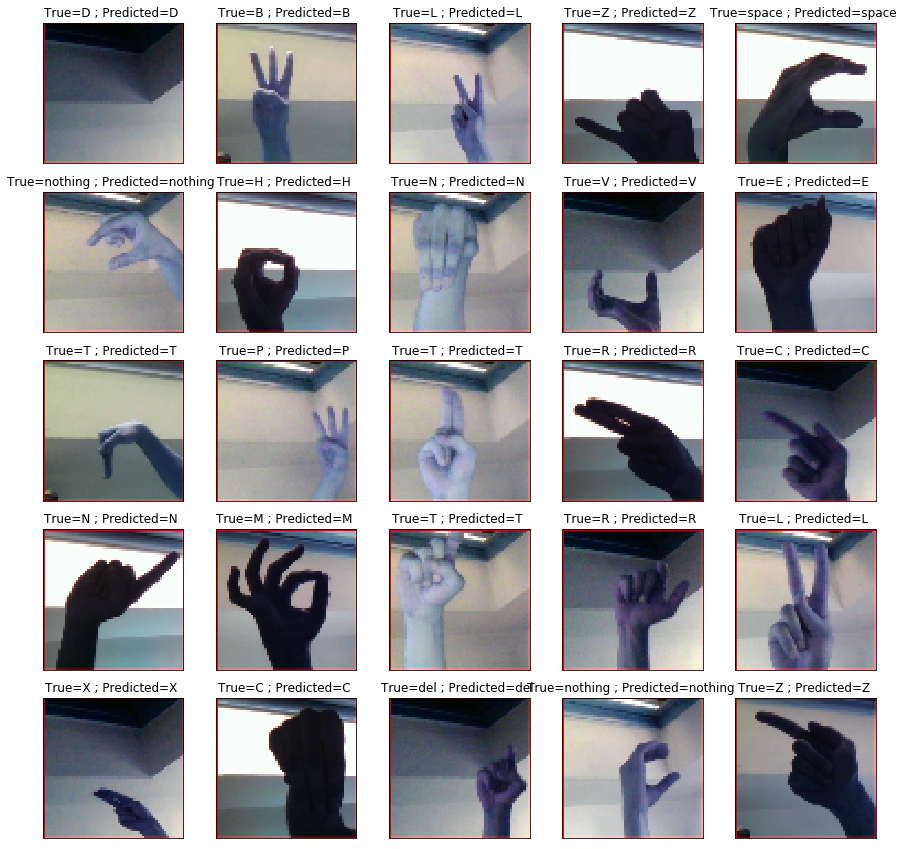

In [25]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
f, axs = plt.subplots(2,2,figsize=(15,15))
for i in range (0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    img_nbr = np.random.randint(0,len(predictions))
    plt.imshow(x_train[img_nbr])
    plt.title("True={} ; Predicted={} ".format(classes[(y_test[img_nbr])], classes[(predictions[img_nbr])]))

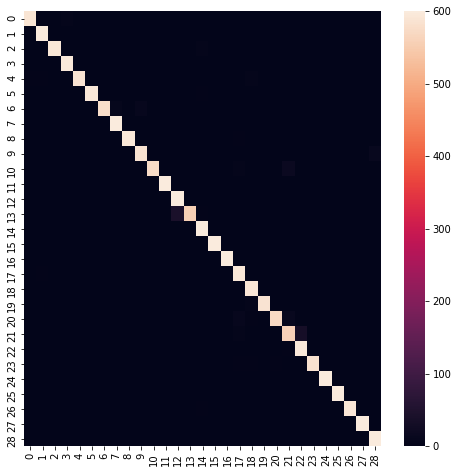

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [77]:
import joblib
import pickle
#joblib.dump(model, './grassknoted-Sequential')
#model.save('grassknoted-Sequential.h5')
#pickle.dump(model, fileobj, protocol=5)
with open('grassknoted-Sequential', 'wb') as file:
    pickle.dump(model,file)

TypeError: can't pickle weakref objects